In [1]:
import numpy as np
import gymnasium as gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
from examples.plots import Plots
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import pandas as pd
import warnings

import math
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import time


import seaborn as sns
sns.set_theme()



## define new functions---------------------

In [2]:
def grid_world_policy_plot_new(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            size = int(math.sqrt(len(np.array(data))))
            data = np.around(np.array(data).reshape((size, size)), 2)
            df = pd.DataFrame(data=data)
            my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
            cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
            ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
            colorbar = ax.collections[0].colorbar
            colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
            colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
            plt.title(label)
            plt.show()

In [3]:
def grid_values_heat_map_new(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            size = int(math.sqrt(len(np.array(data))))
            data = np.around(np.array(data).reshape((size, size)), 2)
            df = pd.DataFrame(data=data)
            sns.heatmap(df, annot=True, annot_kws={"size": 8}).set_title(label)
            plt.show()

In [4]:
def addlabels (x,y):
    for i in range (len(x)):
        if round(y[i],4) < 0:
            plt.text (-0.1*i+1, round(y[i],4) - 0.005, round (y[i],3), ha = 'center')
        else:
            plt.text (-0.1*i+1, round(y[i],4), round (y[i],3), ha = 'center')

## set env-----------------------

In [5]:
'''
fronzen lake: 
    1 for hitting the goal
    -0.01 for walk each step on ice
    -0.1 for step into holes
    is_slippery = False
'''

#set frozen_lake env (small)
frozen_lake_small = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 6, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

#set frozen_lake env (large)
frozen_lake_large = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 15, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [6]:
print ('small problem action space is: ', frozen_lake_small.action_space, '\nsmall state space is: ', frozen_lake_small.observation_space)
print ('large action space is: ', frozen_lake_large.action_space, '\nlarge state space is: ', frozen_lake_large.observation_space)

small problem action space is:  Discrete(4) 
small state space is:  Discrete(36)
large action space is:  Discrete(4) 
large state space is:  Discrete(225)


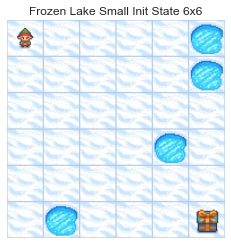

In [7]:
#plot initial state small
init_s = frozen_lake_small.reset(seed=42)
plt.grid(False)
plt.imshow(frozen_lake_small.render())
plt.title('Frozen Lake Small Init State 6x6')
plt.axis('off')
plt.show()

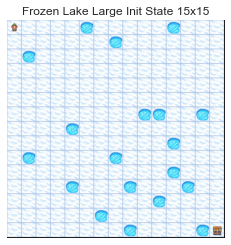

In [8]:
#plot initial state large
init_s = frozen_lake_large.reset(seed=42)
plt.grid(False)
plt.imshow(frozen_lake_large.render())
plt.title('Frozen Lake Large Init State 15x15')
plt.axis('off')
plt.show()


# -----Q learning --------

In [9]:
#set frozen_lake env (small)
frozen_lake_small = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 6, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [10]:
#small
Q_small, V_small, pi_small, Q_track_small, pi_track_small = RL(frozen_lake_small.env).q_learning(init_epsilon = 0.2, min_epsilon=0.1, gamma = 0.99, epsilon_decay_ratio=0.99,n_episodes=500000)

runtime = 94.51 seconds


In [11]:
#set frozen_lake env (large)
frozen_lake_large = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 15, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [12]:
#large
Q_large, V_large, pi_large, Q_track_large, pi_track_large = RL(frozen_lake_large.env).q_learning(init_epsilon=0.2,min_epsilon = 0.1, gamma=0.99,epsilon_decay_ratio=0.99,n_episodes=500000)

runtime = 37.11 seconds


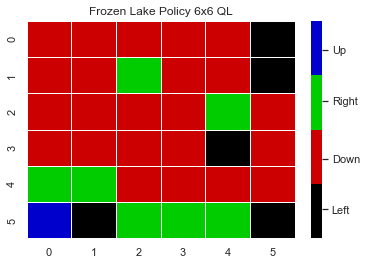

In [13]:
n_states = frozen_lake_small.env.observation_space.n
new_pi = list(map(lambda x: pi_small(x), range(n_states)))
s = int(math.sqrt(n_states))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy 6x6 QL" )

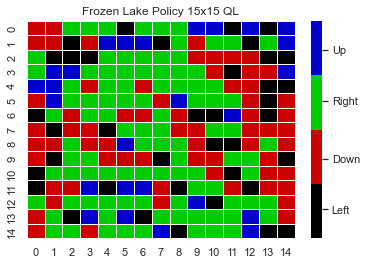

In [14]:
n_states_large = frozen_lake_large.env.observation_space.n
new_pi_large = list(map(lambda x: pi_large(x), range(n_states_large)))
s_large = int(math.sqrt(n_states_large))

grid_world_policy_plot_new(np.array(new_pi_large), "Frozen Lake Policy 15x15 QL")

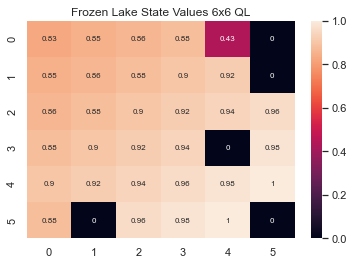

In [16]:
grid_values_heat_map_new(V_small, "Frozen Lake State Values 6x6 QL")

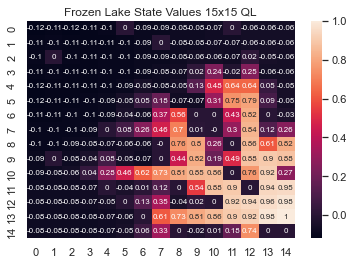

In [17]:
grid_values_heat_map_new(V_large, "Frozen Lake State Values 15x15 QL")

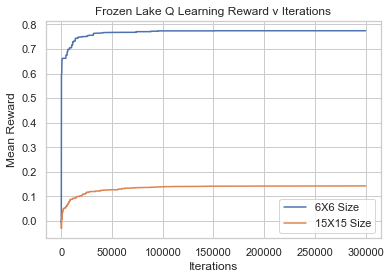

In [18]:
#plot reward v iterations for both small and large

max_reward_per_iter_small = np.mean(np.amax(Q_track_small, axis=2), axis=1)
max_reward_per_iter_large = np.mean(np.amax(Q_track_large, axis=2), axis=1)


df = pd.DataFrame(data=max_reward_per_iter_small)
df_2 = pd.DataFrame(data=max_reward_per_iter_large)
label = "Frozen Lake Q Learning Reward"
df.columns = [label]
df_2.columns = [label]
sns.set_theme(style="whitegrid")
plt.title('Frozen Lake Q Learning Reward v Iterations')
plt.plot(df.index[:300000], df['Frozen Lake Q Learning Reward'][:300000])
plt.plot(df_2.index[:300000], df_2['Frozen Lake Q Learning Reward'][:300000])
plt.xlabel("Iterations")
plt.ylabel("Mean Reward")
plt.legend(['6X6 Size','15X15 Size'], loc = 'lower right')
plt.show()

## Q learning exploration / exploitation ------------------

In [19]:
#try different episilon with same decay ratio
epsilon_lst = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0]
Q_lst=[]
V_lst=[]
pi_lst=[]
Q_track_lst=[]
pi_track_lst=[]
wall_clock_lst = []
for e in epsilon_lst:
    start = time.time()
    Q, V, pi, Q_track, pi_track = RL(frozen_lake_large.env).q_learning(n_episodes=100000, init_epsilon=e, epsilon_decay_ratio=0.9)
    end = time.time()
    wall_clock_lst.append(end-start)
    Q_lst.append(Q)
    V_lst.append(V)
    pi_lst.append(pi)
    Q_track_lst.append(Q_track)
    pi_track_lst.append(pi_track)

runtime = 10.11 seconds


runtime = 9.32 seconds


runtime = 8.74 seconds


runtime = 8.32 seconds


runtime = 8.19 seconds


runtime = 7.96 seconds


runtime = 7.85 seconds


runtime = 7.59 seconds


runtime = 7.53 seconds


runtime = 7.35 seconds


runtime = 7.36 seconds


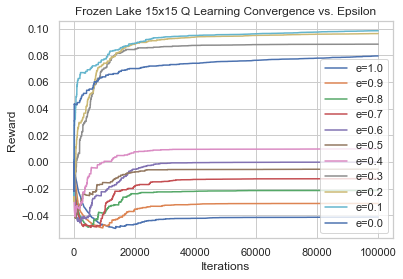

In [20]:
#convergence vs epsilon value
sns.set_theme(style="whitegrid")
plt.title('Frozen Lake 15x15 Q Learning Convergence vs. Epsilon')

for Q_track in Q_track_lst:
    max_reward_per_iter = np.mean(np.amax(Q_track, axis=2), axis=1)
    df = pd.DataFrame(data=max_reward_per_iter)
    label = "Frozen Lake Q Learning Reward"
    df.columns = [label]
    plt.plot(df.index, df['Frozen Lake Q Learning Reward'])



plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.legend(['e=1.0','e=0.9', 'e=0.8', 'e=0.7', 'e=0.6','e=0.5','e=0.4','e=0.3','e=0.2','e=0.1','e=0.0',], loc = 'lower right')
plt.show()

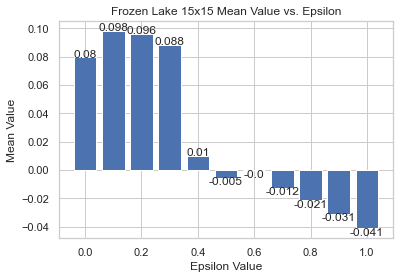

In [21]:
#mean value vs epsilon
plt.title('Frozen Lake 15x15 Mean Value vs. Epsilon')
plt.bar(epsilon_lst, 
        [np.mean(V_lst[i]) for i in range(11)],width=0.08)
addlabels(epsilon_lst,[np.mean(V_lst[i]) for i in range(11)] )
plt.xlabel("Epsilon Value")
plt.ylabel("Mean Value")
plt.show()

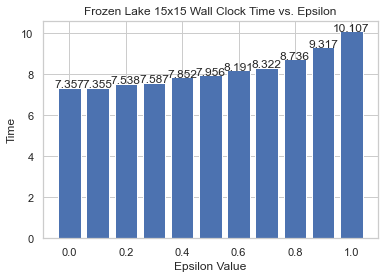

In [22]:
#wall clock time vs epsilon
plt.title('Frozen Lake 15x15 Wall Clock Time vs. Epsilon')
plt.bar(epsilon_lst, wall_clock_lst,width=0.08)
addlabels(epsilon_lst,wall_clock_lst )
plt.xlabel("Epsilon Value")
plt.ylabel("Time")
plt.show()

runtime = 33.78 seconds


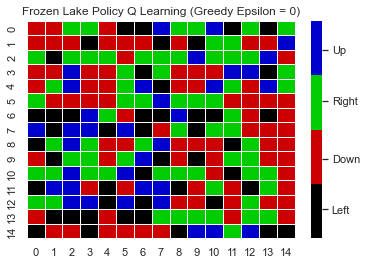

In [23]:
#compare policy plot epsilon = 0.0
Q, V, pi, Q_track, pi_track = RL(frozen_lake_large.env).q_learning(n_episodes=500000, init_epsilon=0.0, min_epsilon=0, epsilon_decay_ratio=0.99)

n_states_large = frozen_lake_large.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states_large)))
s = int(math.sqrt(n_states_large))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy Q Learning (Greedy Epsilon = 0)")

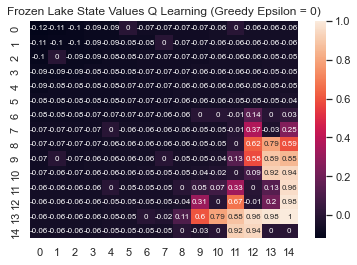

In [24]:
grid_values_heat_map_new(V, "Frozen Lake State Values Q Learning (Greedy Epsilon = 0)")

runtime = 34.99 seconds


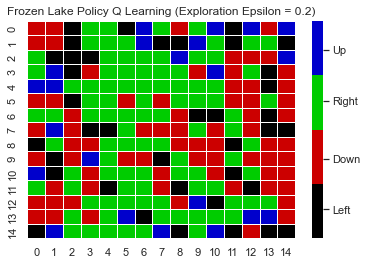

In [25]:
#compare policy plot epsilon = 0.2
Q, V, pi, Q_track, pi_track = RL(frozen_lake_large.env).q_learning(n_episodes=500000, init_epsilon=0.2, min_epsilon=0, epsilon_decay_ratio=0.99)

n_states_large = frozen_lake_large.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states_large)))
s = int(math.sqrt(n_states_large))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy Q Learning (Exploration Epsilon = 0.2)")

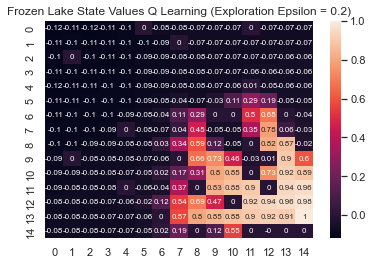

In [26]:
grid_values_heat_map_new(V, "Frozen Lake State Values Q Learning (Exploration Epsilon = 0.2)")

runtime = 220.65 seconds


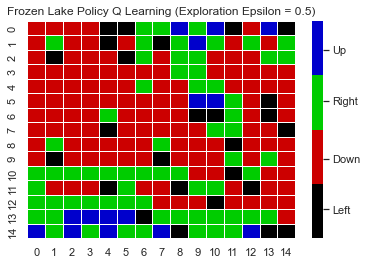

In [27]:
#compare policy plot epsilon = 0.5
Q, V, pi, Q_track, pi_track = RL(frozen_lake_large.env).q_learning(n_episodes=500000, init_epsilon=0.5, min_epsilon=0, epsilon_decay_ratio=0.99)

n_states_large = frozen_lake_large.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states_large)))
s = int(math.sqrt(n_states_large))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy Q Learning (Exploration Epsilon = 0.5)")

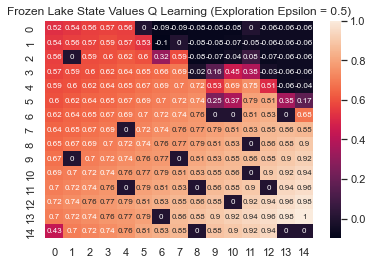

In [28]:
grid_values_heat_map_new(V, "Frozen Lake State Values Q Learning (Exploration Epsilon = 0.5)")

runtime = 46.10 seconds


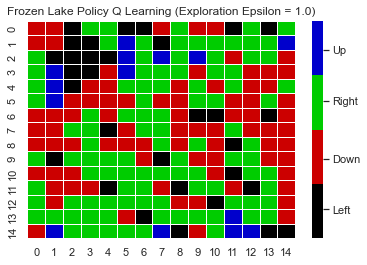

In [29]:
#compare policy plot epsilon = 1.0
Q, V, pi, Q_track, pi_track = RL(frozen_lake_large.env).q_learning(n_episodes=500000, init_epsilon=1.0, min_epsilon=0, epsilon_decay_ratio=0.99)

n_states_large = frozen_lake_large.env.observation_space.n
new_pi = list(map(lambda x: pi(x), range(n_states_large)))
s = int(math.sqrt(n_states_large))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy Q Learning (Exploration Epsilon = 1.0)")

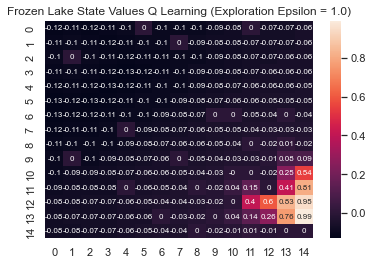

In [30]:
grid_values_heat_map_new(V, "Frozen Lake State Values Q Learning (Exploration Epsilon = 1.0)")

# -----vi --------

In [31]:
#set frozen_lake env (small)
frozen_lake_small = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 6, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [32]:
#VI small
V_small, V_track_small, pi_small = Planner(frozen_lake_small.env.P).value_iteration(n_iters=10000)

runtime = 0.00 seconds


In [33]:
#set frozen_lake env (large)
frozen_lake_large = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 15, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [34]:
#VI large
V_large, V_track_large, pi_large = Planner(frozen_lake_large.env.P).value_iteration(n_iters=10000)

runtime = 0.02 seconds


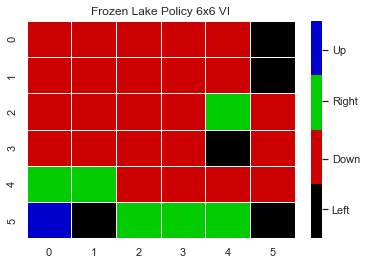

In [35]:
n_states = frozen_lake_small.env.observation_space.n
new_pi = list(map(lambda x: pi_small(x), range(n_states)))
s = int(math.sqrt(n_states))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy 6x6 VI")

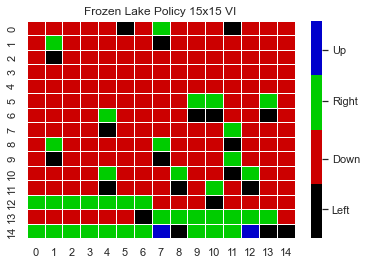

In [36]:
n_states = frozen_lake_large.env.observation_space.n
new_pi = list(map(lambda x: pi_large(x), range(n_states)))
s = int(math.sqrt(n_states))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy 15x15 VI")

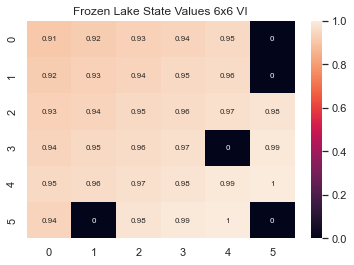

In [37]:
grid_values_heat_map_new(V_small, "Frozen Lake State Values 6x6 VI")

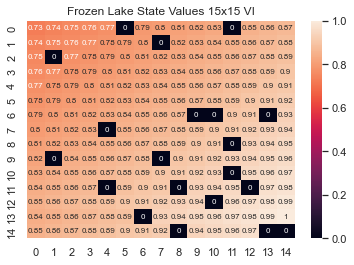

In [38]:
grid_values_heat_map_new(V_large, "Frozen Lake State Values 15x15 VI")

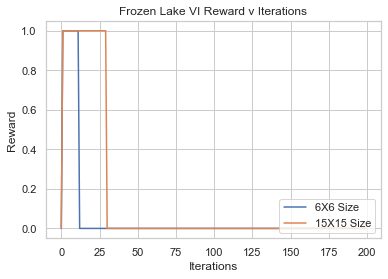

In [39]:
#plot reward v iterations for both small and large

max_reward_per_iter_small = np.amax(V_track_small, axis=1)
max_reward_per_iter_large = np.amax(V_track_large, axis=1)


df = pd.DataFrame(data=max_reward_per_iter_small)
df_2 = pd.DataFrame(data=max_reward_per_iter_large)
label = "Frozen Lake VI Reward"
df.columns = [label]
df_2.columns = [label]
sns.set_theme(style="whitegrid")
plt.title('Frozen Lake VI Reward v Iterations')
plt.plot(df.index[:200], df['Frozen Lake VI Reward'][:200])
plt.plot(df_2.index[:200], df_2['Frozen Lake VI Reward'][:200])
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.legend(['6X6 Size','15X15 Size'], loc = 'lower right')
plt.show()

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


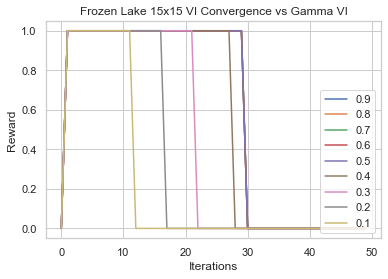

In [40]:
# convergence vs gamma vi
#try different gamma 
gamma_lst = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
V_lst=[]
pi_lst=[]
V_track_lst=[]
pi_track_lst=[]
wall_clock_lst = []
sns.set_theme(style="whitegrid")
plt.title('Frozen Lake 15x15 VI Convergence vs Gamma VI')
for g in gamma_lst:
    start = time.time()
    V, V_track, pi = Planner(frozen_lake_large.env.P).value_iteration(gamma = g, n_iters=10000)
    end = time.time()
    wall_clock_lst.append(end-start)
    V_lst.append(V)
    pi_lst.append(pi)
    V_track_lst.append(V_track)
    pi_track_lst.append(pi_track)


    #plot reward v iterations for different gamma
    max_reward_per_iter = np.amax(V_track, axis=1)

    df = pd.DataFrame(data=max_reward_per_iter)
    label = "Frozen Lake VI Reward"
    df.columns = [label]
    plt.plot(df.index[:50], df['Frozen Lake VI Reward'][:50])

plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.legend(gamma_lst, loc = 'lower right')
plt.show()



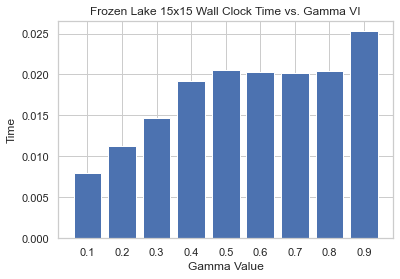

In [41]:
#wall clock time vs epsilon
plt.title('Frozen Lake 15x15 Wall Clock Time vs. Gamma VI')
plt.bar(gamma_lst, wall_clock_lst,width=0.08)
#addlabels(gamma_lst,wall_clock_lst )
plt.xticks(gamma_lst)
plt.xlabel("Gamma Value")
plt.ylabel("Time")
plt.show()

# -----pi --------

In [42]:
#set frozen_lake env (small)
frozen_lake_small = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 6, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [43]:
#PI small
V_small, V_track_small, pi_small = Planner(frozen_lake_small.env.P).policy_iteration(n_iters=10000,gamma = 0.9, theta=1e-10)

runtime = 0.05 seconds


In [44]:
#set frozen_lake env (large)
frozen_lake_large = gym.make('FrozenLake-v1', 
                        desc = generate_random_map(size = 15, p = 0.9, seed = 42),
                        # desc = None, 
                        #map_name = '4x4', 
                        is_slippery=False,
                        render_mode = 'rgb_array')

In [45]:
#PI large
V_large, V_track_large, pi_large = Planner(frozen_lake_large.env.P).policy_iteration(n_iters=10000,gamma = 0.9, theta=1e-10)

runtime = 1.39 seconds


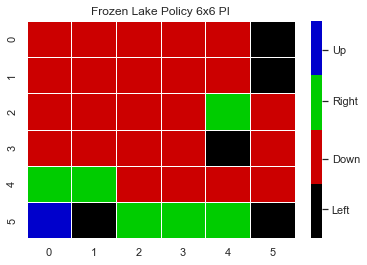

In [46]:
n_states = frozen_lake_small.env.observation_space.n
new_pi = list(map(lambda x: pi_small(x), range(n_states)))
s = int(math.sqrt(n_states))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy 6x6 PI" )

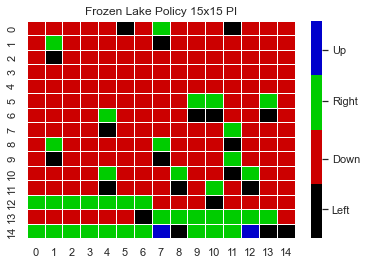

In [47]:
n_states = frozen_lake_large.env.observation_space.n
new_pi = list(map(lambda x: pi_large(x), range(n_states)))
s = int(math.sqrt(n_states))

grid_world_policy_plot_new(np.array(new_pi), "Frozen Lake Policy 15x15 PI" )

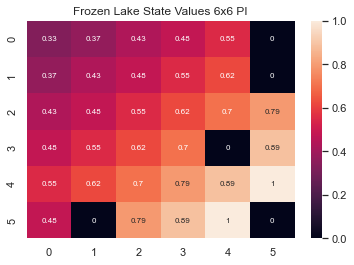

In [48]:
grid_values_heat_map_new(V_small, "Frozen Lake State Values 6x6 PI")

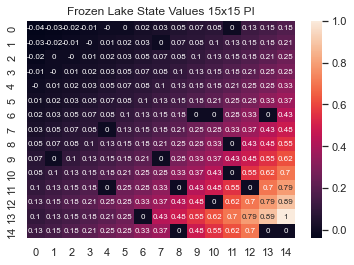

In [49]:
grid_values_heat_map_new(V_large, "Frozen Lake State Values 15x15 PI")

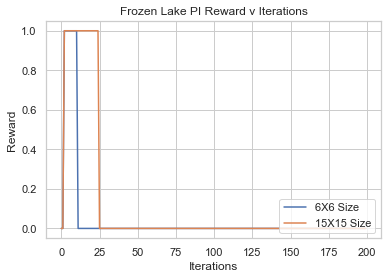

In [50]:
#plot reward v iterations for both small and large

max_reward_per_iter_small = np.amax(V_track_small, axis=1)
max_reward_per_iter_large = np.amax(V_track_large, axis=1)


df = pd.DataFrame(data=max_reward_per_iter_small)
df_2 = pd.DataFrame(data=max_reward_per_iter_large)
label = "Frozen Lake PI Reward"
df.columns = [label]
df_2.columns = [label]
sns.set_theme(style="whitegrid")
plt.title('Frozen Lake PI Reward v Iterations')
plt.plot(df.index[:200], df['Frozen Lake PI Reward'][:200])
plt.plot(df_2.index[:200], df_2['Frozen Lake PI Reward'][:200])
plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.legend(['6X6 Size','15X15 Size'], loc = 'lower right')
plt.show()

runtime = 1.35 seconds
runtime = 0.92 seconds
runtime = 0.80 seconds
runtime = 0.72 seconds
runtime = 0.69 seconds
runtime = 0.67 seconds
runtime = 0.62 seconds
runtime = 0.57 seconds
runtime = 0.42 seconds


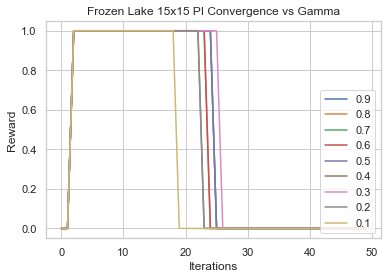

In [51]:
# convergence vs gamma vi
#try different gamma 
gamma_lst = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
V_lst=[]
pi_lst=[]
V_track_lst=[]
pi_track_lst=[]
wall_clock_lst = []
sns.set_theme(style="whitegrid")
plt.title('Frozen Lake 15x15 PI Convergence vs Gamma')
for g in gamma_lst:
    start = time.time()
    V, V_track, pi = Planner(frozen_lake_large.env.P).policy_iteration(gamma = g, n_iters=10000)
    end = time.time()
    wall_clock_lst.append(end-start)
    V_lst.append(V)
    pi_lst.append(pi)
    V_track_lst.append(V_track)
    pi_track_lst.append(pi_track)


    #plot reward v iterations for different gamma
    max_reward_per_iter = np.amax(V_track, axis=1)

    df = pd.DataFrame(data=max_reward_per_iter)
    label = "Frozen Lake PI Reward"
    df.columns = [label]
    plt.plot(df.index[:50], df['Frozen Lake PI Reward'][:50])

plt.xlabel("Iterations")
plt.ylabel("Reward")
plt.legend(gamma_lst, loc = 'lower right')
plt.show()

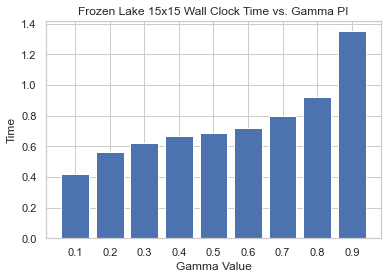

In [52]:
#wall clock time vs epsilon
plt.title('Frozen Lake 15x15 Wall Clock Time vs. Gamma PI')
plt.bar(gamma_lst, wall_clock_lst,width=0.08)
#addlabels(gamma_lst,wall_clock_lst )
plt.xticks(gamma_lst)
plt.xlabel("Gamma Value")
plt.ylabel("Time")
plt.show()